# Python for Computer Vision: Working with Images, Vectorization and Broadcasting

### **Introduction**

**Why Python?** 

Python is a popular choice in various fields, including computer vision, due to its simplicity and readability, making it great for beginners. It also has a strong community support and a wealth of libraries, which makes complex tasks more manageable. This combination of ease of use and powerful features makes Python a go-to language for both learning and implementing advanced concepts.

\
**Yupiter Notebook**

Jupyter Notebooks are interactive coding environments in a webpage format. Write your code between the ### START CODE HERE ### and ### END CODE HERE ### comments. To run your code, press "SHIFT"+"ENTER" or click the "Run Cell" button with a play symbol. Don't worry about the exact number of lines of code; "(≈ X lines of code)" is just a guide. 




## 1 Getting started with Numpy
**What is NumPy?**

NumPy is a fundamental package in Python used for scientific computing. It allows us to work with high-performance arrays and matrices, making operations that involve large amounts of data much faster and easier. NumPy is not just useful in computer vision; it's a versatile tool that's essential in various areas of data analysis, scientific research, and engineering. Its efficiency and wide range of functionalities make it a cornerstone for anyone working with data in Python.
If you want to learn more about NumPy, visit https://numpy.org/ . \
Now let's get started!

First, ensure that you have NumPy installed. If not, you can install it using pip.


Now, import NumPy in your notebook! By importing this way you can acces numpy by writing "np." instead of "numpy."

In [172]:
import numpy as np


### 1.1 Fundamental Operations in NumPy

**Creating Arrays** \
NumPy's primary data structure is the multi-dimensional array. Let's begin by creating a simple one-dimensional array.

In [195]:
# Create a one-dimensional NumPy array
array_1d = np.array([1, 2, 3, 4, 5])
print("1D Array:", array_1d)

1D Array: [1 2 3 4 5]


**Array Arithmetic** \
You can perform arithmetic operations on arrays easily. Let’s try some basic operations.

In [196]:
# Basic arithmetic operations
array_plus_10 = array_1d + 10
print("Array plus 10:", array_plus_10)

Array plus 10: [11 12 13 14 15]


**Array Shape and Reshape** \
Understanding an array's shape is crucial. Use shape to see the dimensions of an array. You can also reshape arrays.

In [197]:
# Array shape
print("1D Array:", array_1d)
print("Shape of 1D array:", array_1d.shape)

# Reshaping the array from 1D to 2D
array_2d = array_1d.reshape(5, 1)
print("Reshaped to 2D array:\n", array_2d)
print("Shape of 2D array:", array_2d.shape)


1D Array: [1 2 3 4 5]
Shape of 1D array: (5,)
Reshaped to 2D array:
 [[1]
 [2]
 [3]
 [4]
 [5]]
Shape of 2D array: (5, 1)


**Note** that in NumPy, the shape of a one-dimensional array is represented as (n,), where 'n' is the number of elements. The comma is used to denote it's a tuple representing the array's dimensionality, even though there's only one dimension.

<font color='red'>
What you need to remember about NumPy:

* NumPy is essential for scientific computing in Python, offering high-performance array and matrix operations.
* It's widely used beyond computer vision, in data analysis, scientific research, and engineering.
* Core features include creating and manipulating multi-dimensional arrays.
* Understanding and modifying array shapes and dimensions is crucial for effective data manipulation.

## 2 Vectorization
### 2.1 Definition and importance
Vectorization is a pivotal concept in the field of data science and machine learning, particularly when it comes to optimizing computational efficiency. At its core, vectorization is about expressing operations as occurring on entire arrays or matrices, rather than through explicit iteration over individual elements.

In the context of programming, especially with languages like Python, vectorization refers to the practice of using more abstract and powerful operations that act on whole arrays or datasets at once, rather than using slower, explicit loops. This not only results in **cleaner, more readable code** but also takes advantage of underlying optimizations and parallel processing capabilities, leading to **significant speed improvements**.

For instance, in Python, libraries such as NumPy are built with vectorization in mind, allowing for operations on entire arrays with a single line of code. 

Let's take an example where we will sum the elements of a large array. We'll compare a traditional loop-based approach with a vectorized approach using NumPy, and measure the execution time for both. To create a large array, we will use *np.random.rand* which generates a large array of random floating-point numbers, where each number is uniformly distributed between 0 and 1.

In [198]:
import time

# Creating a large array
large_array = np.random.rand(1000000)

# Start measuring time
start_time = time.time()

# Summing using a loop
sum_loop = 0
for i in large_array:
    sum_loop += i

# End measuring time
end_time = time.time()
time_loop = end_time - start_time

print("Sum using loop:", sum_loop)
print("Time taken by loop:", time_loop, "seconds")


Sum using loop: 499839.1489539265
Time taken by loop: 0.1574263572692871 seconds


In [199]:
# Start measuring time
start_time = time.time()

# Summing using NumPy's sum function
sum_vectorized = np.sum(large_array)

# End measuring time
end_time = time.time()
time_vectorized = end_time - start_time

print("Sum using NumPy:", sum_vectorized)
print("Time taken by NumPy:", time_vectorized, "seconds")

Sum using NumPy: 499839.1489539472
Time taken by NumPy: 0.0019459724426269531 seconds


### 2.2 Implementing L2 Loss Function
**Remind**: The L2 loss function, also known as the mean squared error or quadratic loss, is commonly used in regression problems. It measures the squared average difference between the actual and predicted values. The formula for L2 loss is:
$$\begin{align*} & L_2(\hat{y},y) = \sum_{i=0}^m(y^{(i)} - \hat{y}^{(i)})^2 \end{align*}\tag{7}$$
where $y$ is the vector of true values, and $\hat{y}$ is the vector of predicted values.
The L2 loss is a method to quantify the difference between the predicted and true values. A lower L2 loss value indicates a better model performance.

**Exercise**: Implement the `calculate_l2_loss` function to compute the L2 loss for given true values and predictions. You should use `np.dot` for this task.

**Note**:
* The `np.dot` function computes the dot product of two arrays. For 1-D arrays, it computes the inner product, and for 2-D arrays, it's equivalent to matrix multiplication. In the context of the L2 loss function, np.dot is used to calculate the sum of the squared differences. \
Example: np.dot(a, b) where a and b are 1-D arrays.

* In NumPy, the `*` operator is used for element-wise multiplication of arrays. If you multiply two arrays of the same shape using *, each pair of elements at corresponding positions in the arrays are multiplied together. \
Example: a * b multiplies each element of array a with the corresponding element of array b.

* `np.multiply` is another way to perform element-wise multiplication. It's functionally identical to using the `*` operator but is explicitly named, which can be more readable. \
Example: np.multiply(a, b) is equivalent to a * b.

In [200]:

def calculate_l2_loss(y_true, y_pred):
    """
    Parameters:
    - y_true: NumPy array of true values
    - y_pred: NumPy array of predicted values
    
    Returns:
    - l2_loss: Calculated L2 loss as a float
    """
    ### START CODE HERE ### (≈ 1-2 lines of code)
    x = y_true - y_pred
    l2_loss = np.dot(x,x) 
    ### END CODE HERE ###
    
    return l2_loss

In [201]:
# Test your function
y_true = np.array([1.0, 2.0, 3.0])
y_pred = np.array([1.1, 1.9, 3.2])

l2_loss = calculate_l2_loss(y_true, y_pred)
print("L2 Loss:", l2_loss)


L2 Loss: 0.06000000000000011


Expected output: \
L2 Loss: 0.06

Alternatively, the L2 Loss can be computed using element-wise multiplication with either `np.multiply`  or the `*` operator. By first calculating the element-wise difference between the actual and predicted values, we then square this difference by multiplying the difference array with itself. Finally, the `sum` of these squared values gives us the L2 Loss.

In [203]:
def alternative_l2_loss(y_true, y_pred):
    difference = y_true - y_pred
    squared_difference = difference * difference  # or np.multiply(difference, difference)
    l2_loss = np.sum(squared_difference)
    return l2_loss

# Should be the same result as above
l2_loss = alternative_l2_loss(y_true, y_pred)
print("L2 Loss:", l2_loss)

L2 Loss: 0.06000000000000011


<font color='red'>
What you need to remember about Vectorization:

* Vectorization is key for speed and efficiency in Python, particularly with NumPy.
* It allows for element-wise operations on arrays without explicit loops.
* Utilize NumPy's vectorized functions like np.sum, np.dot for performance gains.
* Essential for processing large datasets and computational tasks in machine learning.
* Reduces code complexity and execution time significantly.

## 3 Broadcasting
### 3.1 Definition and importance
Broadcasting in NumPy is a concept that extends the power of vectorization. While vectorization allows for efficient element-wise operations on arrays of the same shape, broadcasting takes this a step further. It enables similar operations on arrays of different shapes, providing a means to apply arithmetic operations on arrays that do not initially match in size.

**Differences Between Broadcasting and Vectorization:**

* **Operation Scope**: Vectorization is about performing element-wise operations on arrays of the same size. It requires the operands (arrays) to have an identical shape.
Broadcasting, on the other hand, is about expanding the smaller array's dimensions to match the larger array's dimensions, enabling element-wise operations on arrays of different sizes.

* **Memory Efficiency:** Both vectorization and broadcasting are memory efficient, but broadcasting stands out when working with arrays of different sizes. It virtually expands the smaller array without actually creating a larger array in memory.

* **Usage Scenarios**: Use vectorization when your data arrays are already aligned in shape and size.
Use broadcasting when you need to perform operations on arrays of different shapes and sizes, like adding a scalar to a matrix or applying a vector to each row/column of a matrix.


Now we will explore the efficiency of broadcasting in NumPy and compare it with more traditional methods of operating on arrays of different sizes. Let's consider a common scenario where we need to add a vector to each row of a matrix. This operation is quite frequent in data processing and machine learning tasks.

First, we will perform this operation without using broadcasting, which involves manually expanding the vector or using loops. Then, we will use broadcasting to achieve the same result and compare the execution times of both methods.

This comparison will help us understand the performance benefits of broadcasting, especially when dealing with large datasets.

In [204]:
# Create a matrix and a vector
matrix = np.random.rand(1000, 1000)
vector = np.random.rand(1000)

# Start measuring time
start_time = time.time()

# Manually expanding the vector + addition
result_manual = np.empty_like(matrix)
for i in range(matrix.shape[0]):
    result_manual[i, :] = matrix[i, :] + vector

# End measuring time
end_time = time.time()
time_without_broadcasting = end_time - start_time

print("result:", result_manual)
print("Time without broadcasting:", time_without_broadcasting, "seconds")


result: [[1.20422575 1.27142298 0.86339183 ... 0.10813175 1.74583837 1.37078168]
 [1.76328918 1.29639766 0.65145238 ... 0.83970203 1.49868403 1.6839263 ]
 [1.50635786 1.38721017 0.74164511 ... 0.20552792 1.01806821 1.35103862]
 ...
 [1.56053067 0.59135113 0.4811216  ... 0.58581462 1.64377825 1.41503276]
 [1.95095122 1.27123742 0.34368431 ... 0.30404914 1.18542114 1.4744397 ]
 [1.95280333 0.84556666 0.57532437 ... 0.32667869 1.46368364 0.99683592]]
Time without broadcasting: 0.003025531768798828 seconds


In [205]:
# Start measuring time
start_time = time.time()

# Use Broadcasting for addition
result_broadcast = matrix + vector

# End measuring time
end_time = time.time()
time_with_broadcasting = end_time - start_time

print("result:", result_broadcast)
print("Time with broadcasting:", time_with_broadcasting, "seconds")


result: [[1.20422575 1.27142298 0.86339183 ... 0.10813175 1.74583837 1.37078168]
 [1.76328918 1.29639766 0.65145238 ... 0.83970203 1.49868403 1.6839263 ]
 [1.50635786 1.38721017 0.74164511 ... 0.20552792 1.01806821 1.35103862]
 ...
 [1.56053067 0.59135113 0.4811216  ... 0.58581462 1.64377825 1.41503276]
 [1.95095122 1.27123742 0.34368431 ... 0.30404914 1.18542114 1.4744397 ]
 [1.95280333 0.84556666 0.57532437 ... 0.32667869 1.46368364 0.99683592]]
Time with broadcasting: 0.007664918899536133 seconds


After running these code snippets, pay attention to the execution time. You will notice that the broadcasting approach not only simplifies the code but also runs significantly faster, demonstrating the power of NumPy's broadcasting in optimizing array operations.

### 3.2 Centering Input Examples Around Feature Mean
In machine learning and deep learning, normalizing data is a common practice, often leading to better performance as it aids in faster convergence of gradient descent algorithms. Normalization in this context refers to adjusting data such that the mean of each feature across the dataset is zero. This is accomplished by subtracting the mean of each feature from the corresponding values.

Consider the following example where $x$ is a dataset:
For example, if $$x = 
\begin{bmatrix}
    1 & 5 & 9 \\
    4 & 7 & 10 \\
    3 & 2 & 6 \\
\end{bmatrix}\tag{3}$$
In this matrix, the dimensions (n, m) represent three features (n) and three training examples (m). To center the data around the feature mean, we calculate the mean of each row (feature) using NumPy's mean function with axis=1 and keepdims=True:
$$\bar{x} =  x_{mean} = np.mean(x, axis = 1, keepdims=True) = \begin{bmatrix}    5\\
    7 \\
    3.6667 \\
\end{bmatrix}\tag{3}$$
Then, we shift the original matrix x by this mean:
$$ x_{shifted} = x - x_{mean} = \begin{bmatrix}
   -4 &  0 &  4 \\
   -3 & 0 & 3\\
 -0.6667  & -1.6667  & 2.3333 \\
\end{bmatrix}\tag{5}$$ 

Notice how we can subtract matrices of different sizes, thanks to broadcasting in NumPy.

**Exercise**: Implement the `shiftRowsAroundMean()` function to normalize the data by centering each feature (row) of a matrix around its mean.

In [206]:
def shiftRowsAroundMean(x):
    """
    Normalize the data by shifting each row of the matrix x around the mean of that row.
    
    Arguments:
    x -- A numpy matrix of shape (n, m), where n is the number of features, and m is the number of examples
    
    Returns:
    x_shifted -- The matrix with normalized data.
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    x_mean = np.mean(x, axis=1, keepdims=True)
    x_shifted = x - x_mean
    ### END CODE HERE ###

    return x_shifted

In [207]:
# Test the function with an example matrix
example_matrix = np.array([[1, 5, 9], [4, 7, 10], [3, 2, 6]])
shifted_matrix = shiftRowsAroundMean(example_matrix)
print("Shifted Matrix:\n", shifted_matrix)

Shifted Matrix:
 [[-4.          0.          4.        ]
 [-3.          0.          3.        ]
 [-0.66666667 -1.66666667  2.33333333]]


Expected output: 
\begin{bmatrix}
   -4 &  0 &  4 \\
   -3 & 0 & 3\\
 -0.6667  & -1.6667  & 2.3333 \\
\end{bmatrix}

<font color='red'>
What you need to remember about Broadcasting:

* Broadcasting in NumPy simplifies arithmetic operations on arrays of different sizes.
* It extends the power of vectorization by allowing element-wise operations without matching array sizes.
* Essential for memory-efficient array manipulations in Python.
* Frequently used in machine learning for data normalization and array transformations.
* Understanding broadcasting rules is crucial for avoiding dimension-related errors in code.

## 4 Working with images
Images are a fundamental part of our digital world and play a crucial role in various fields, from social media and graphic design to advanced applications like computer vision, medical imaging, and artificial intelligence. In this chapter, we delve into the basics of image processing, an essential skill set in the modern world of technology.

[Matplotlib](https://matplotlib.org/) is a widely-used Python library for creating static, animated, and interactive visualizations. Known for its versatility and ease of use, it provides a MATLAB-like interface for plotting graphs, charts, and images. Whether you're dealing with simple line plots or complex visualizations, Matplotlib is an essential tool in the data visualization and scientific computing toolkit.

Matplotlib's function `imread` reads an image and converts it into a NumPy-Array. You can also show the image very easily:




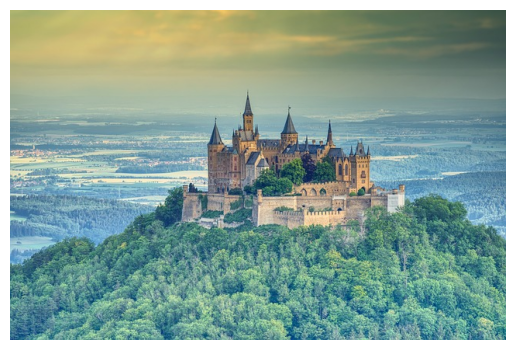

In [208]:
import matplotlib.pyplot as plt

# load image with imread
image = plt.imread("Images/Burg-Hohenzollern.jpg")

# Anzeigen des Bildes
plt.imshow(image)
plt.axis('off') 
plt.show()

When having the image as an NumPy-Array, you can access its properties. 

**Remember**: The image array dimensions of an RGB image are (height, width, 3)!

In [209]:
# Accessing image properties
print(f"Image dimensions: {image.shape}")


Image dimensions: (426, 640, 3)


### 4.1 Adjusting the brightness
#### 4.1.1 Only using numpy
In image processing, adjusting the brightness of an image is a basic operation. This operation typically involves scaling the pixel values of the image. By scaling, we mean multiplying the image array by a factor that increases or decreases the brightness.

For instance, if we have an image array where the image array dimensions are (height, width, 3) for an RGB image.\
However, since image pixel values must be within the range [0, 255] for each color channel, we need to ensure that any operation we perform respects this constraint. This is where the np.clip function comes into play, ensuring that all our pixel values will remain within the valid range after the brightness adjustment.

**Exercise**: Implement the `adjust_brightness` function to modify the brightness of an image. Your task is to normalize the image array (between 0 and 1) and multiply the brightness-factor.

In [210]:
def adjust_brightness(image, factor):
    """
    Parameters:
    - image_path: The path to the image file
    - factor: Factor by which the brightness is adjusted. 
              Values > 1 will increase brightness, values < 1 will decrease it.
    
    Returns:
    - adjusted_image: NumPy array of the adjusted image.
    """
    
    # convert to float
    image = image.astype(np.float32) 

    ### START CODE HERE ### (≈ 2 line of code)
    image = image /255
    image = image * factor
    ### END CODE HERE ###
   
    # np.clip ensures that the adjusted pixel values remain within the valid range (0-1).
    # Values less than 0 are set to 0, and values greater than 1 are set to 1.
    adjusted_image = np.clip(image, 0, 1)  

    # convert back to uint8
    adjusted_image = (adjusted_image * 255).astype(np.uint8)
    
    return adjusted_image

Now test your function by running the cell below. Try to modify the brightness factor. **Note** that values > 1 will increase brightness, values < 1 will decrease it.

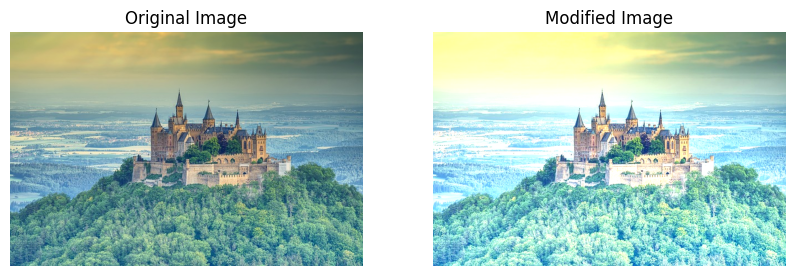

In [212]:
# load image
image = plt.imread("Images/Burg-Hohenzollern.jpg")

# adjust brightness
brightness_factor = 1.5 
brighter_image = adjust_brightness(image, brightness_factor)

# Create subplots to display two images side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off') 

# Display the modified image
ax[1].imshow(brighter_image)
ax[1].set_title('Modified Image')
ax[1].axis('off') 

# Show the plot
plt.show()


#### 4.1.2 Using Pillow
To simplify the task of adjusting the brightness of an image, we can use higher-level libraries like Pillow: 

[Pillow](https://pypi.org/project/pillow/) (Python Imaging Library) is an open-source library that adds image processing capabilities to your Python interpreter. It provides a wide array of image processing tools, one being `ImageEnhance`, which includes a straightforward way to adjust an image's brightness.

**Exercise**: Complete the `enhance_brightness` function using Pillow's `ImageEnhance.Brightness`.\
Here's how you can use it: 

- Create an instance of `ImageEnhance.Brightness` with the image as an argument.
- Call the `.enhance()` method on this instance with the factor as an argument.

In [213]:
from PIL import Image, ImageEnhance

def enhance_brightness(image_path, factor):
    """
    Parameters:
    - image_path: The path to the image file
    - factor: The factor by which the brightness will be adjusted. 
              Values > 1 will increase brightness, while values < 1 will decrease it.
              
    Returns:
    - brightened_image: An Image object with adjusted brightness.
    """
    # Load the image
    image = Image.open(image_path)
    
    ### START CODE HERE ### (≈ 1 line of code)
    enhancer = ImageEnhance.Brightness(image)
    brightened_image = enhancer.enhance(factor) 
    ### END CODE HERE ###
    
    return brightened_image


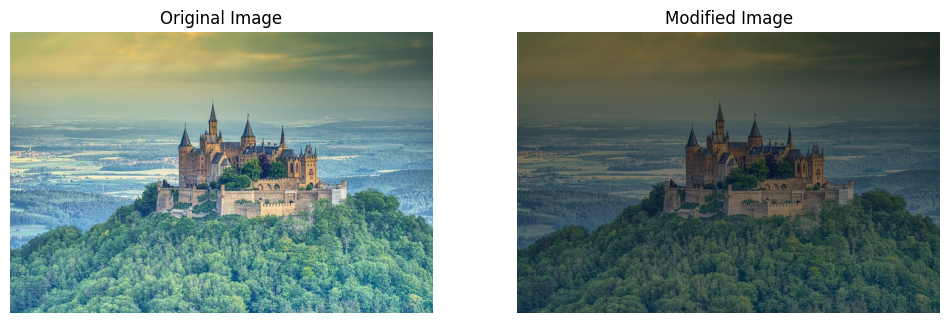

In [214]:
# Now let's test your function

image_path = "Images/Burg-Hohenzollern.jpg" 

# Here you can modify the factor to adjust brightness
brightness_factor = 0.5  

# call the function from above
brighter_image = enhance_brightness(image_path, brightness_factor)

# Display the original and modified images side by side for comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
original_image = Image.open(image_path)
ax[0].imshow(original_image)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Modified image
ax[1].imshow(brighter_image)
ax[1].set_title('Modified Image')
ax[1].axis('off')

plt.show()

### 4.2 Cropping an image with Pillow
Cropping is a common image processing operation that involves removing certain parts of an image to focus on a specific area or to change the aspect ratio. Pillow provides an easy-to-use method for cropping images.

**Exercise**: Complete the `crop_image` function to crop an image

Call the `crop()` method on an Image object with the `crop_coordinates` as an argument

In [215]:
def crop_image(image_path, crop_coordinates):
    """
    Parameters:
    - image_path: The path to the image file
    - crop_coordinates: A tuple of (left, upper, right, lower) coordinates for cropping
    
    Returns:
    - cropped_image: A cropped Image object.
    """
    # Load the image
    image = Image.open(image_path)
    
    ### START CODE HERE ### (≈ 1 line of code)
    cropped_image = image.crop(crop_coordinates)
    ### END CODE HERE ###
    
    return cropped_image

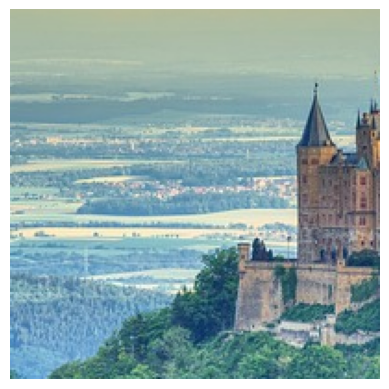

In [216]:
# Now let's test your function

image_path = "Images/Burg-Hohenzollern.jpg"

# define the coordinates = (left, upper, right, lower)
crop_coordinates = (100, 100, 300, 300)   

# call the function from above
cropped_image = crop_image(image_path, crop_coordinates)

# Display cropped image
plt.imshow(cropped_image)
plt.axis('off') 
plt.show()

Expected output:

<img src="Images/Burg-Hohenzollern_cropped.jpg">

### 4.3 Resizing an image with Pillow
Resizing is a common operation in image processing where the dimensions of an image are altered. Resizing can be used to reduce the size of an image for faster processing or to increase the size for a more detailed view. Pillow provides a simple method for resizing images that maintains the aspect ratio or changes it according to your needs.

**Exercise**: Implement the `resize_image` function to change the dimensions of an image. You will specify the new width and height to resize the image.

Call the `resize()` method on an Image object with `new_size` (a tuple of the new width and height you will define later)

In [217]:
def resize_image(image_path, new_size):
    """
    Parameters:
    - image_path: The path to the image file
    - new_size: A tuple of (new_width, new_height) for the new size
    
    Returns:
    - resized_image: A resized Image object.
    """
    # Load the image
    image = Image.open(image_path)
    
    ### START CODE HERE ### (≈ 1 line of code)
    resized_image = image.resize(new_size)
    ### END CODE HERE ###
    
    return resized_image

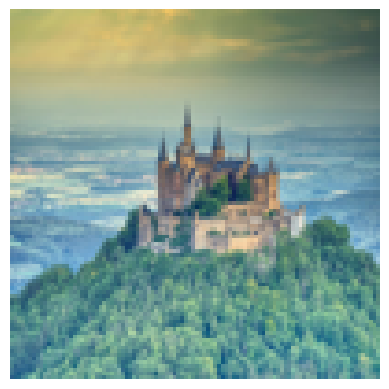

Original image dimensions: (640, 426)
Resized image dimensions: (100, 100)


In [218]:
# Now let's test your function

image_path = "Images/Burg-Hohenzollern.jpg"

# Define the new size = (width, height)
# You can also try weird touples like (100, 400)
new_size = (100, 100)  

# Call the function from above
resized_image = resize_image(image_path, new_size)

# Display resized image
plt.imshow(resized_image)
plt.axis('off') 
plt.show()

image = Image.open(image_path)
print(f"Original image dimensions: {image.size}")
print(f"Resized image dimensions: {resized_image.size}")

<font color='red'>
What you need to remember about working with images:

* Pillow and Matplotlib are powerful tools for image processing and visualization in Python.
* Common operations include adjusting brightness, cropping, and resizing images.
* These operations can enhance image quality and are essential for preprocessing in machine learning.
* Understanding image data structures and manipulations is key in computer vision tasks.
* Efficient image processing is crucial for handling large datasets and real-time applications.
